In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

# Danh sách các nhãn tương ứng với các giá trị 0-4
labels = ["Poor", "Fair", "Good", "Very Good", "Exceptional"]

# Tạo từ điển ánh xạ từ nhãn sang giá trị 0-4
label_to_value = {label: i for i, label in enumerate(labels)}

# Giả sử bạn có dữ liệu dưới dạng danh sách các cặp và số lượng của chúng
df = pd.read_csv("Lending-Data-Ethereum-Labeled.csv")
df.dropna(inplace=True)

# Đếm số lượng các cặp
count = defaultdict(int)
for y1, y2 in zip(df["1st_label"], df["2nd_label"]):
    pair = (min(y1, y2), max(y1, y2))
    count[pair] += 1



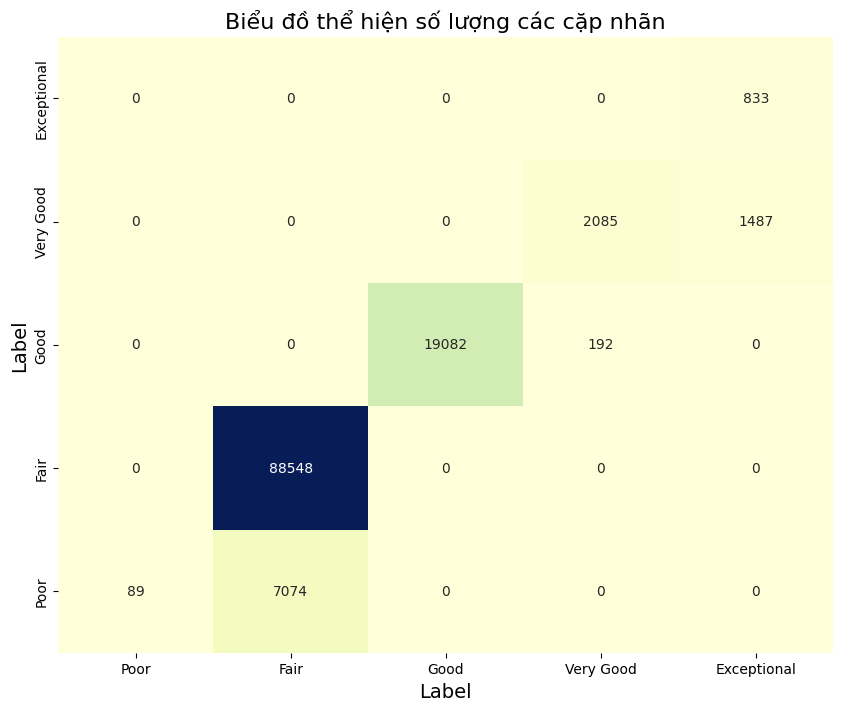

In [2]:
data = {"a": [], "b": [], "count": []}
for key, value in count.items():
    data["a"].append(int(key[0]))
    data["b"].append(int(key[1]))
    data["count"].append(value)

# Chuyển đổi giá trị 0-4 thành nhãn tương ứng
data['a'] = [labels[i] for i in data['a']]
data['b'] = [labels[i] for i in data['b']]

# Chuyển dữ liệu thành DataFrame
df = pd.DataFrame(data)

# Đặt thứ tự cho các nhãn
cat_type = pd.CategoricalDtype(categories=labels, ordered=True)
df['a'] = df['a'].astype(cat_type)
df['b'] = df['b'].astype(cat_type)

# Pivot DataFrame để phù hợp với định dạng của heatmap
heatmap_data = df.pivot(index="a", columns="b", values="count")

# Sắp xếp lại các chỉ mục và cột theo thứ tự phân loại
heatmap_data = heatmap_data.reindex(index=labels[::-1], columns=labels)

# Chuyển đổi giá trị NaN thành 0 nếu cần
heatmap_data = heatmap_data.fillna(0).astype(int)

# Vẽ heatmap bằng seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", cbar=False)


# Đổi tên hai trục
plt.xlabel("Label", fontsize=14)
plt.ylabel("Label", fontsize=14)
# Thêm tiêu đề cho hình ảnh
plt.title("Biểu đồ thể hiện số lượng các cặp nhãn", fontsize=16)

# Hiển thị biểu đồ
plt.show()